In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

In [ ]:
df = pd.read_csv(r'PCOS_dataset.csv')
print(df.shape)
df.describe()

(1174, 9)


,Glucose,BMI,Age,cp,trestbps,chol,fbs,ca,target
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,125.070698,32.193015,39.518739,1.061329,127.448041,247.505963,0.056218,0.192504,0.369676
std,33.579125,7.542486,13.778267,0.669379,12.888873,42.139656,0.230440,0.560488,0.482923
min,0.000000,0.000000,21.000000,0.000000,94.000000,141.000000,0.000000,0.000000,0.000000
25%,102.000000,27.600000,26.000000,1.000000,126.000000,234.000000,0.000000,0.000000,0.000000
50%,122.000000,32.500000,41.000000,1.000000,127.000000,247.000000,0.000000,0.000000,0.000000
75%,146.000000,36.600000,50.750000,1.000000,130.000000,247.000000,0.000000,0.000000,1.000000
max,199.000000,67.100000,81.000000,3.000000,200.000000,564.000000,1.000000,3.000000,1.000000


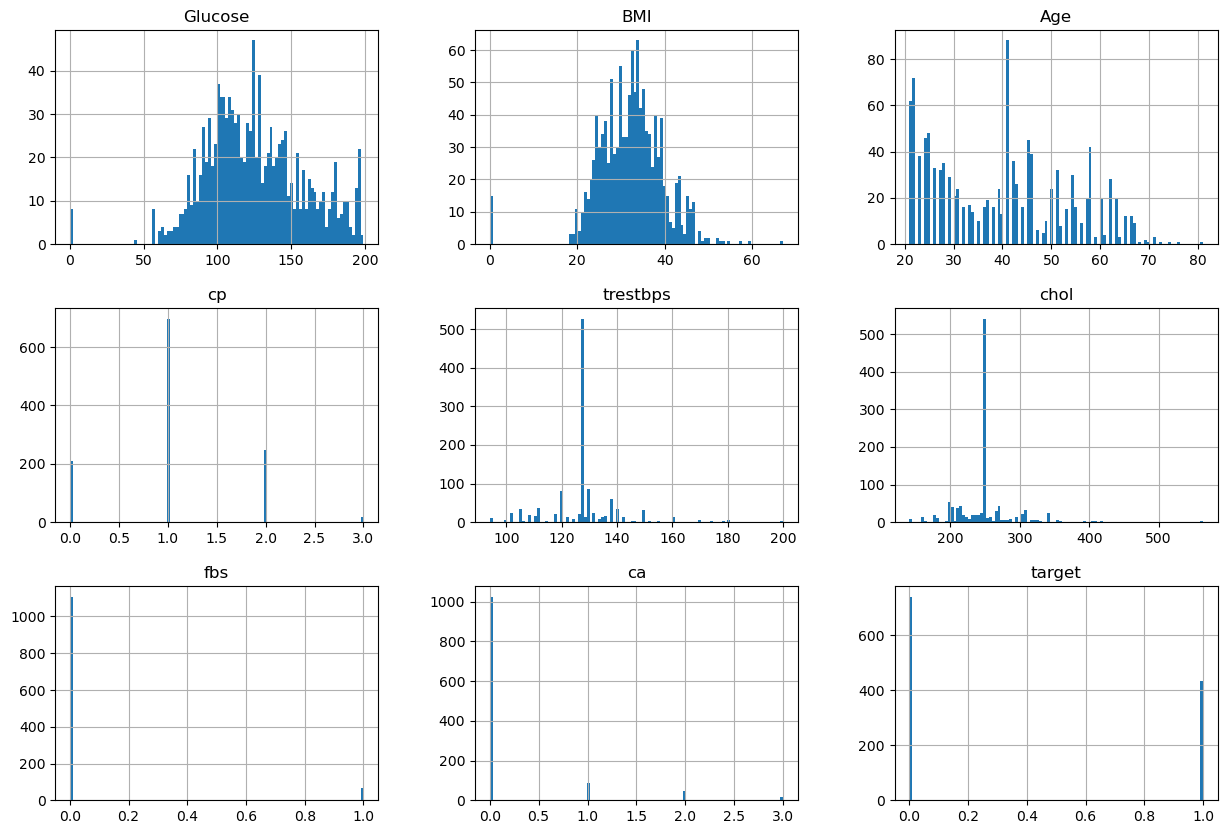

In [ ]:
histdf = df.hist(bins=100,figsize=(15,10))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

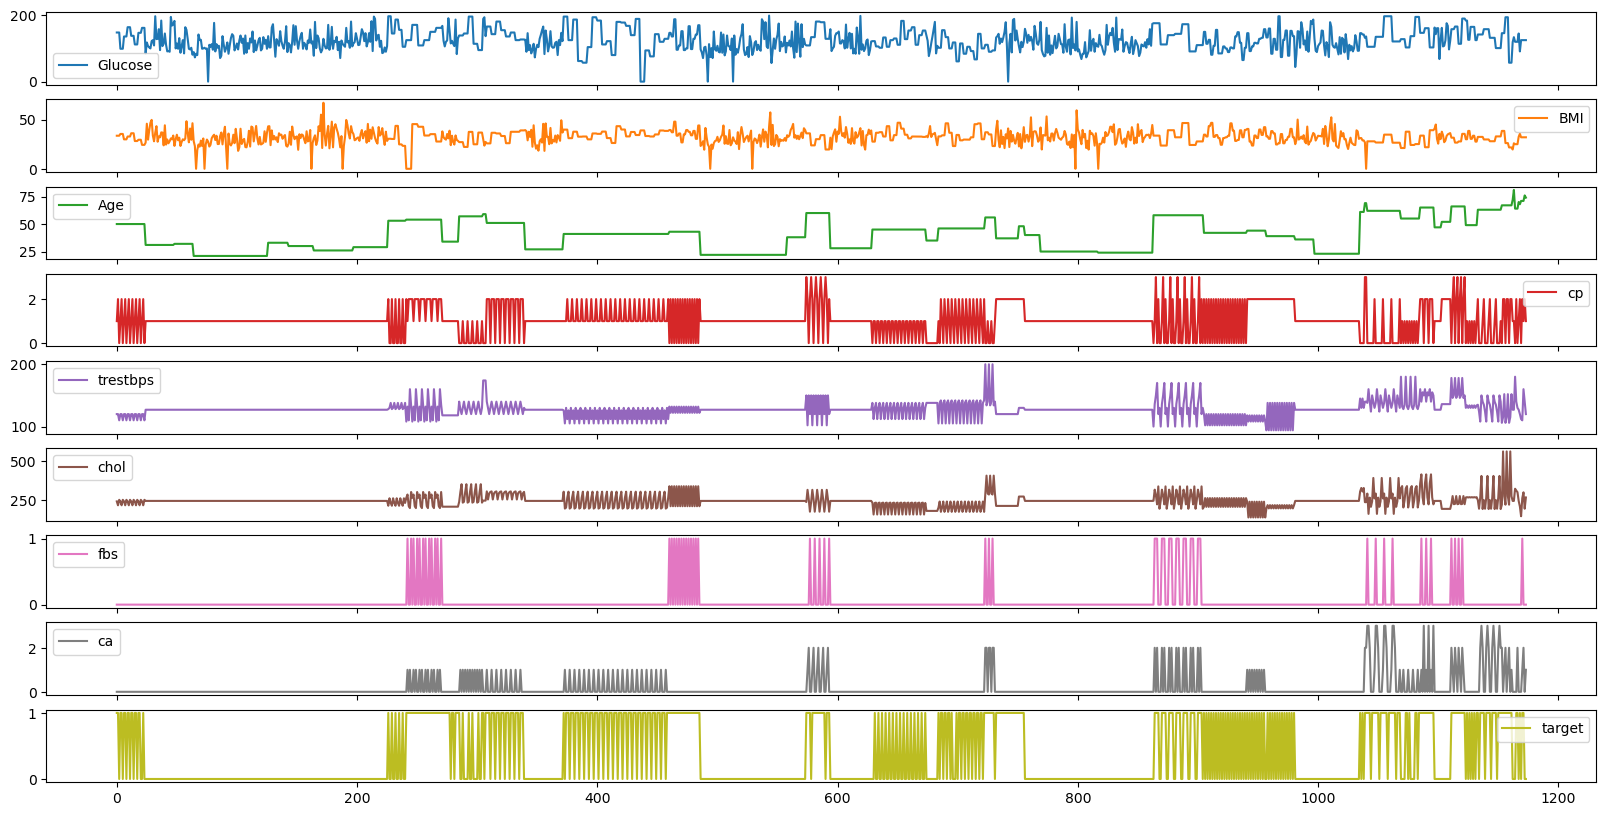

In [ ]:
df.plot(subplots=True,figsize=(20,10))

In [ ]:
df.isnull().sum()

Glucose     0
BMI         0
Age         0
cp          0
trestbps    0
chol        0
fbs         0
ca          0
target      0
dtype: int64

<AxesSubplot:>

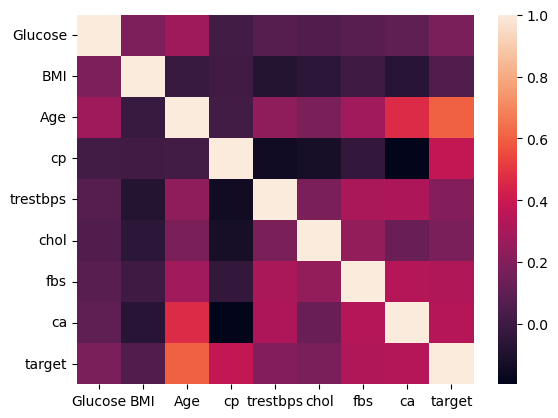

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.head()

,Glucose,BMI,Age,cp,trestbps,chol,fbs,ca,target
0,148.0,33.6,50,1.0,120.0,244.0,0.0,0.0,1
1,148.0,33.6,50,2.0,120.0,219.0,0.0,0.0,1
2,148.0,33.6,50,0.0,110.0,254.0,0.0,0.0,0
3,99.0,35.4,50,1.0,120.0,244.0,0.0,0.0,1
4,99.0,35.4,50,2.0,120.0,219.0,0.0,0.0,1


C:\Users\DBANSJ2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DBANSJ2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DBANSJ2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DBANSJ2\Anaconda

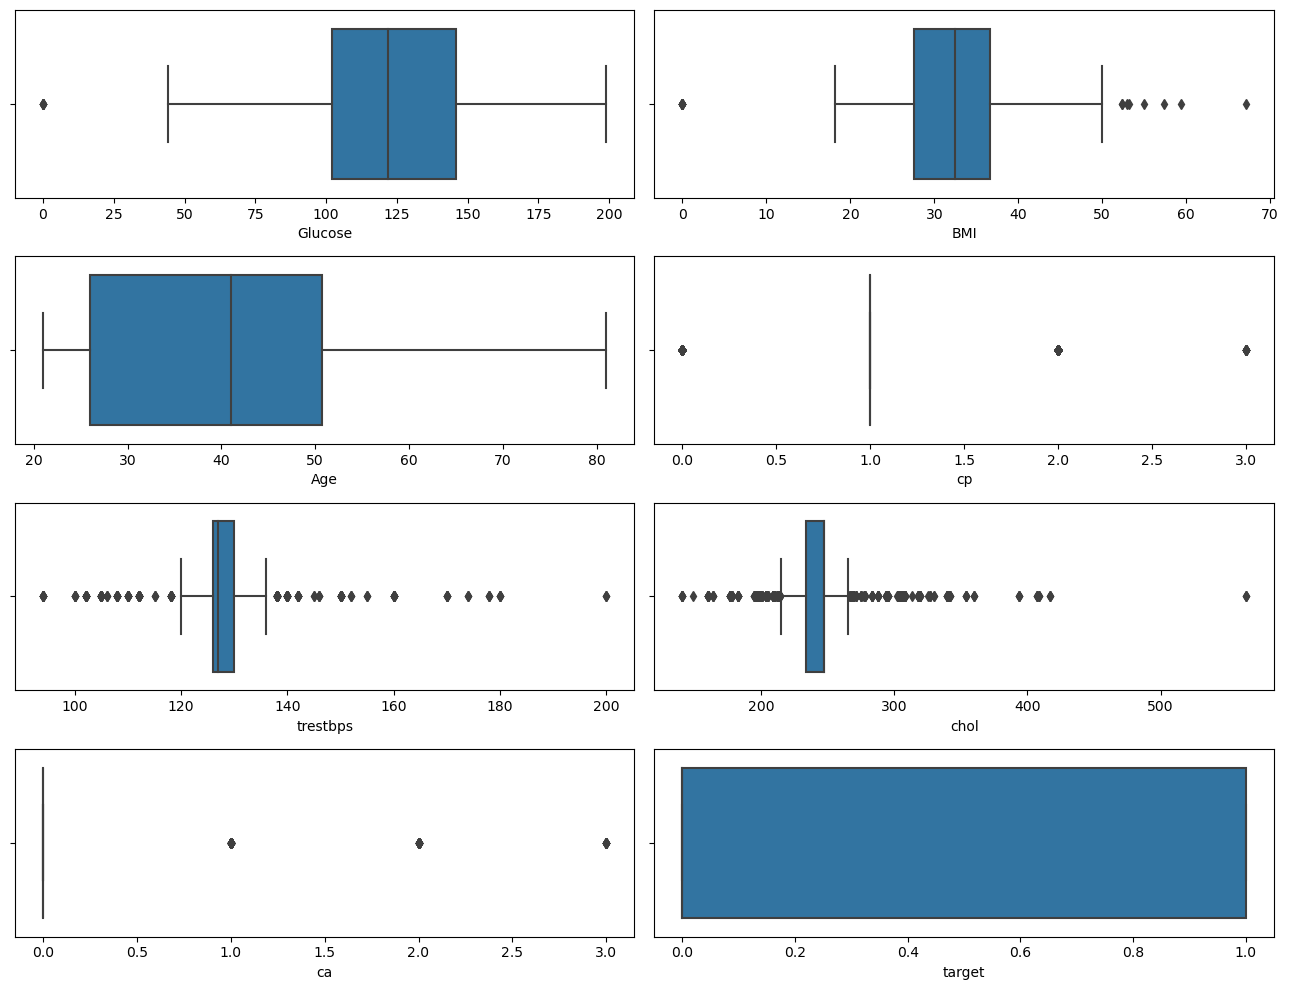

In [ ]:
plt.figure(figsize=(13,10))
plt.subplot(4,2,1)
sns.boxplot(df['Glucose'])

plt.subplot(4,2,2)
sns.boxplot(df['BMI'])

plt.subplot(4,2,3)
sns.boxplot(df['Age'])

plt.subplot(4,2,4)
sns.boxplot(df['cp'])

plt.subplot(4,2,5)
sns.boxplot(df['trestbps'])

plt.subplot(4,2,6)
sns.boxplot(df['chol'])

plt.subplot(4,2,7)
sns.boxplot(df['ca'])

plt.subplot(4,2,8)
sns.boxplot(df['target'])
plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum()

Glucose     0
BMI         0
Age         0
cp          0
trestbps    0
chol        0
fbs         0
ca          0
target      0
dtype: int64

In [ ]:
scale=StandardScaler()
scale.fit(df)
df= scale.transform(df)

In [ ]:
np.shape(df)

(1174, 9)

In [ ]:
df=pd.DataFrame(df,columns=['Age','BMI','cp','trestbps','chol','Glucose','fbs','ca','target'])

In [ ]:
df.head()

,Age,BMI,cp,trestbps,chol,Glucose,fbs,ca,target
0,0.683135,0.186621,0.761034,-0.091659,-0.578112,-0.083234,-0.244063,-0.343605,1.305783
1,0.683135,0.186621,0.761034,1.402899,-0.578112,-0.676752,-0.244063,-0.343605,1.305783
2,0.683135,0.186621,0.761034,-1.586218,-1.354306,0.154173,-0.244063,-0.343605,-0.765824
3,-0.776727,0.425371,0.761034,-0.091659,-0.578112,-0.083234,-0.244063,-0.343605,1.305783
4,-0.776727,0.425371,0.761034,1.402899,-0.578112,-0.676752,-0.244063,-0.343605,1.305783


In [ ]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1:]

In [ ]:
x.isnull().sum()

Age         0
BMI         0
cp          0
trestbps    0
chol        0
Glucose     0
fbs         0
ca          0
dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=41)

In [ ]:
np.shape(y_test)

(353, 1)

In [ ]:
np.shape(x_train)

(821, 8)

In [ ]:
lbl= LabelEncoder()

In [ ]:
encoded_y_f=lbl.fit_transform(y)
encoded_y_f=pd.DataFrame(encoded_y_f)


C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
encoded_y= lbl.fit_transform(y_train)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)

LogisticRegression()

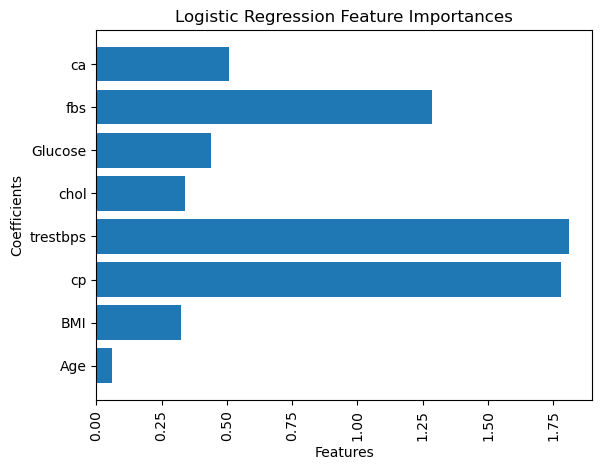

In [ ]:
import matplotlib.pyplot as plt

# Assuming your logistic regression object is called logreg
coefs = logreg.coef_[0]
features = list(x_train.columns)

# Plot the feature importances
plt.barh(features, coefs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Feature Importances')
plt.show()


In [ ]:
encoded_ytest= lbl.fit_transform(y_test)

C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Y_pred1 = logreg.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

# class labels
target_names = ['PCOS_not_detected', 'PCOS_detected']

# generate classification report
print(classification_report(encoded_ytest, Y_pred1, target_names=target_names))


                   precision    recall  f1-score   support

PCOS_not_detected       0.88      0.94      0.91       209
    PCOS_detected       0.90      0.81      0.85       144

         accuracy                           0.89       353
        macro avg       0.89      0.88      0.88       353
     weighted avg       0.89      0.89      0.89       353



In [ ]:
lr_conf_matrix = confusion_matrix(encoded_ytest,Y_pred1 )

In [ ]:
lr_conf_matrix

array([[196,  13],
       [ 27, 117]], dtype=int64)

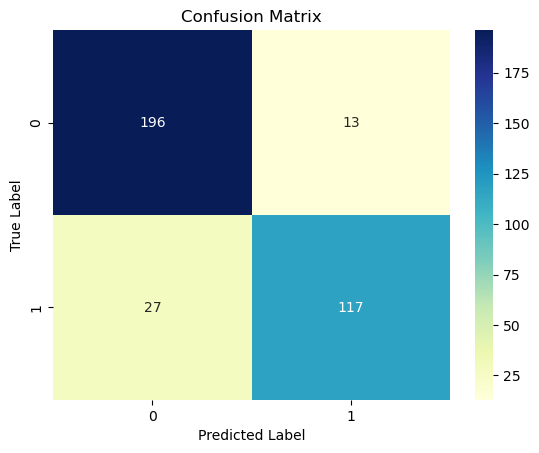

In [ ]:
# Plot confusion matrix heatmap
sns.heatmap(lr_conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report,f1_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['f1']
cv_results = []

for train_index, test_index in kf.split(x):
    x_train_fold = x.iloc[train_index]
    y_train_fold = encoded_y_f.iloc[train_index]
    y_train_fold = np.ravel(y_train_fold)
    x_test_fold = x.iloc[test_index]
    y_test_fold = encoded_y_f.iloc[test_index]

    logreg.fit(x_train_fold, y_train_fold)
    y_pred_fold = logreg.predict(x_test_fold)

    cv_results.append({
        'train_index': train_index,
        'test_index': test_index,
        'f1_score': f1_score(y_test_fold, y_pred_fold)
    })

# Select the best fold based on the F1 score
best_fold = max(cv_results, key=lambda x: x['f1_score'])

# Train and test the model on the best fold
x_train_best_fold = x.iloc[best_fold['train_index']]
y_train_best_fold = encoded_y_f.iloc[best_fold['train_index']]
x_test_best_fold = x.iloc[best_fold['test_index']]
y_test_best_fold = encoded_y_f.iloc[best_fold['test_index']]
print(np.shape(x_train_best_fold))
np.shape(x_test_best_fold)

(939, 8)


(235, 8)

In [ ]:

logreg.fit(x_train_best_fold, y_train_best_fold)
y_pred_best_fold = logreg.predict(x_test_best_fold)
# class labels
target_names = ['PCOS_not_detected', 'PCOS_detected']

# Evaluate the model on the best fold
print(classification_report(y_test_best_fold, y_pred_best_fold,target_names =target_names))

                   precision    recall  f1-score   support

PCOS_not_detected       0.93      0.95      0.94       157
    PCOS_detected       0.89      0.85      0.87        78

         accuracy                           0.91       235
        macro avg       0.91      0.90      0.90       235
     weighted avg       0.91      0.91      0.91       235



C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


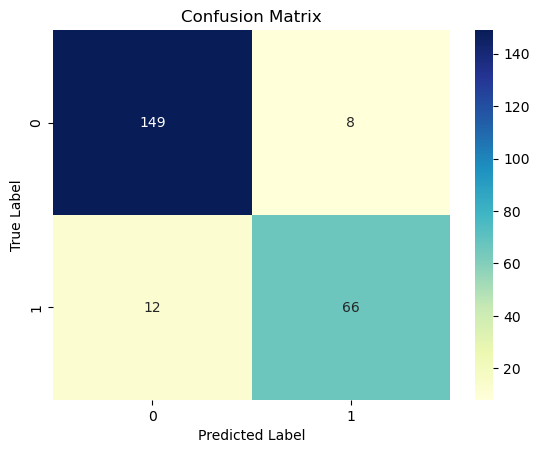

In [ ]:
lr_conf_matrix = confusion_matrix(y_test_best_fold, y_pred_best_fold)
# Plot confusion matrix heatmap
sns.heatmap(lr_conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
encoded_y_fr=np.ravel(encoded_y_f)
scores = cross_val_score(logreg, x, encoded_y_fr, cv=5)
mean_score = scores.mean()
print(mean_score)

0.8644808146935805


In [ ]:
tree = tree= DecisionTreeClassifier()
tree.fit(x_train, encoded_y)

DecisionTreeClassifier()

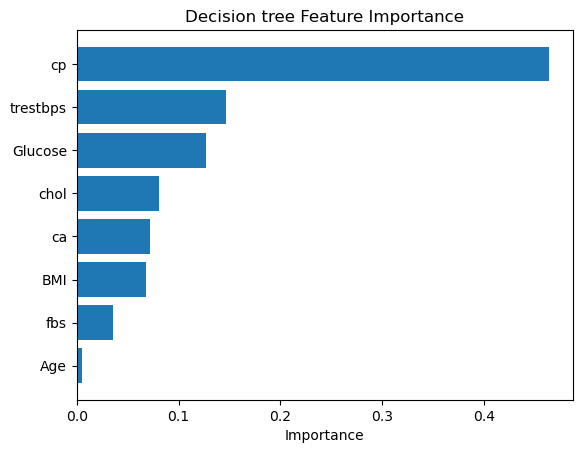

In [ ]:

# Get feature importances
importances = tree.feature_importances_

# Get feature names
feature_names = x_train.columns

# Sort features by importance
sorted_idx = importances.argsort()

# Plot feature importances
plt.barh(range(len(sorted_idx)), importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.title('Decision tree Feature Importance')
plt.show()


In [ ]:
Y_pred2 = tree.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

# class labels
target_names = ['PCOS_not_detected', 'PCOS_detected']

# generate classification report
print(classification_report(encoded_ytest, Y_pred2, target_names=target_names))


                   precision    recall  f1-score   support

PCOS_not_detected       0.99      1.00      0.99       209
    PCOS_detected       0.99      0.98      0.99       144

         accuracy                           0.99       353
        macro avg       0.99      0.99      0.99       353
     weighted avg       0.99      0.99      0.99       353



In [ ]:
encoded_y_fr=np.ravel(encoded_y_f)
scores = cross_val_score(tree, x, encoded_y_fr, cv=5)
mean_score = scores.mean()
print(mean_score)

0.8338134206219314


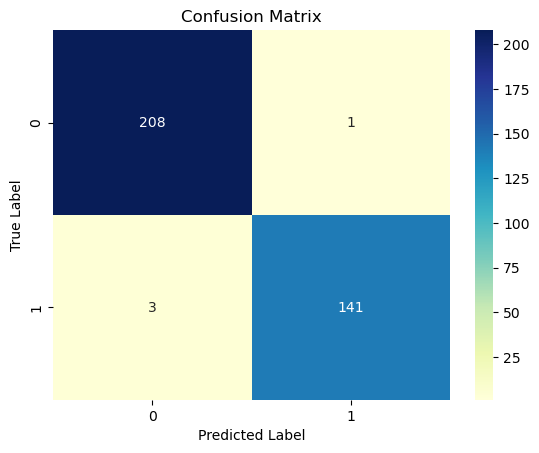

In [ ]:
tree_conf_matrix = confusion_matrix(encoded_ytest, Y_pred2)
# Plot confusion matrix heatmap
sns.heatmap(tree_conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
rf= RandomForestClassifier()

In [ ]:
rf.fit(x_train,encoded_y)


RandomForestClassifier()

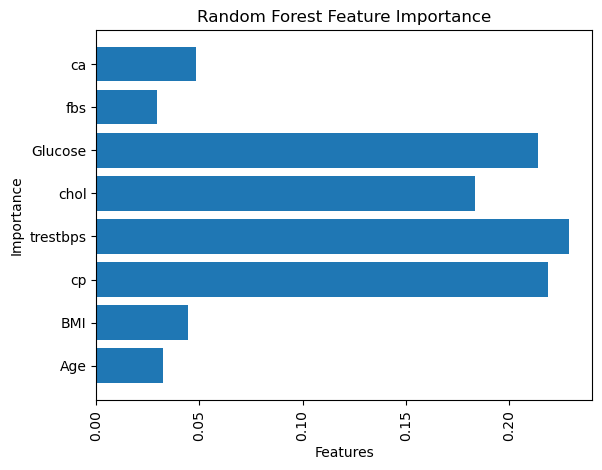

In [ ]:
importances = rf.feature_importances_

# Get the feature names
feature_names = x_train.columns

# Create a bar plot of feature importances
plt.barh(feature_names, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
ypred3 = rf.predict(x_test)
# generate classification report
print(classification_report(encoded_ytest, ypred3, target_names=target_names))


                   precision    recall  f1-score   support

PCOS_not_detected       0.98      1.00      0.99       209
    PCOS_detected       0.99      0.97      0.98       144

         accuracy                           0.99       353
        macro avg       0.99      0.98      0.99       353
     weighted avg       0.99      0.99      0.99       353



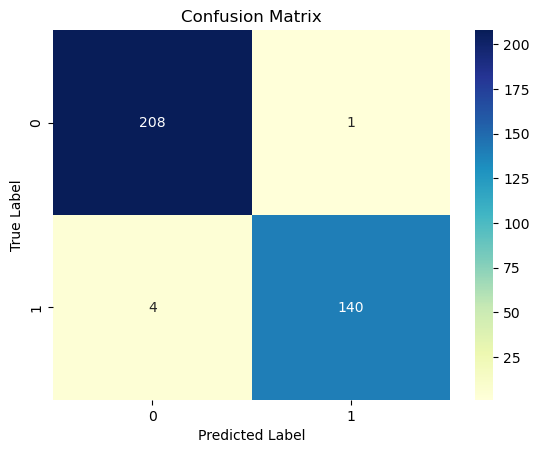

In [ ]:
RF_conf_matrix = confusion_matrix(encoded_ytest, ypred3)
# Plot confusion matrix heatmap
sns.heatmap(RF_conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
encoded_y_fr=np.ravel(encoded_y_f)
scores = cross_val_score(rf, x, encoded_y_fr, cv=5)
mean_score = scores.mean()
print(mean_score)

0.884095290052737


In [ ]:
error_rate= []
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,encoded_y)
    pred= knn.predict(x_test)
    error_rate.append(np.mean(pred != encoded_ytest))

C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

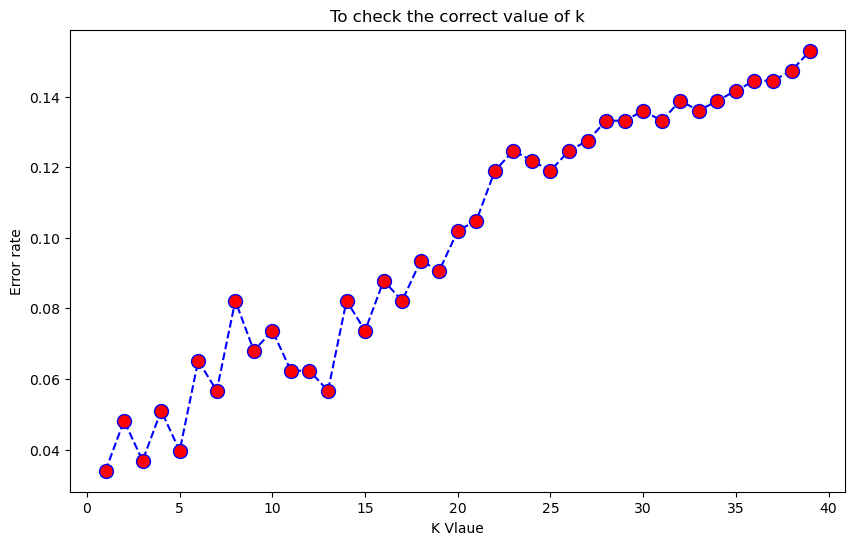

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K Vlaue')
plt.ylabel('Error rate')
plt.title('To check the correct value of k')
plt.show()

In [ ]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,encoded_y)
ypred4= knn.predict(x_test)

C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation feature importance scores
result = permutation_importance(knn, x_train, encoded_y, n_repeats=10)

# Get feature importance scores
importance_scores = result.importances_mean

# Print feature importance scores
for i, score in enumerate(importance_scores):
    print(f"Feature {i}: {score}")

C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

Feature 0: 0.006455542021924487
Feature 1: 0.010109622411693043
Feature 2: 0.13008526187576125
Feature 3: 0.17771010962241168
Feature 4: 0.07101096224116929
Feature 5: 0.12009744214372715
Feature 6: 0.04433617539585869
Feature 7: 0.04774665042630938


C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

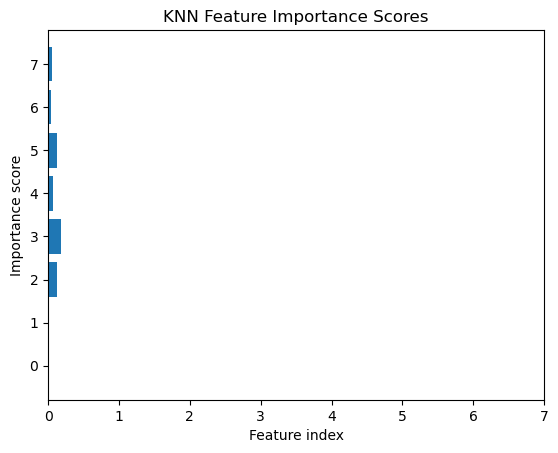

In [ ]:
# Plot feature importance scores
plt.barh(range(x_train.shape[1]), importance_scores)
plt.xticks(range(x_train.shape[1]))
plt.xlabel("Feature index")
plt.ylabel("Importance score")
plt.title("KNN Feature Importance Scores")
plt.show()

In [ ]:
print(classification_report(encoded_ytest, ypred4, target_names=target_names))

                   precision    recall  f1-score   support

PCOS_not_detected       0.95      0.99      0.97       209
    PCOS_detected       0.98      0.92      0.95       144

         accuracy                           0.96       353
        macro avg       0.96      0.95      0.96       353
     weighted avg       0.96      0.96      0.96       353



In [ ]:
encoded_y_fr=np.ravel(encoded_y_f)
scores = cross_val_score(knn, x, encoded_y_fr, cv=5)
mean_score = scores.mean()
print(mean_score)

0.8738679759956355


C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

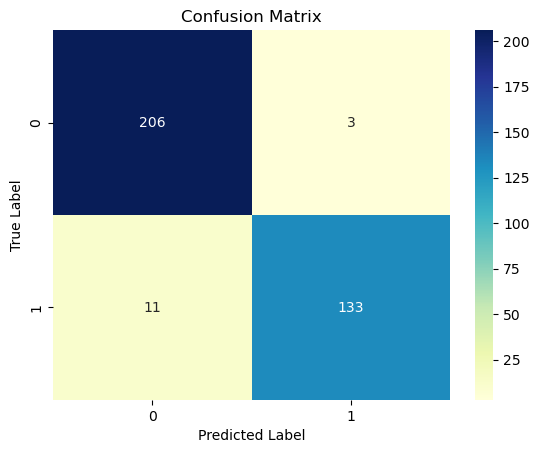

In [ ]:
knn_conf_matrix = confusion_matrix(encoded_ytest, ypred4)
# Plot confusion matrix heatmap
sns.heatmap(knn_conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn import svm
svm= svm.SVC()
svm.fit(x_train,encoded_y)

SVC()

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation feature importance scores
result = permutation_importance(svm, x_train, encoded_y, n_repeats=10)

# Get feature importance scores
importance_scores = result.importances_mean

# Print feature importance scores
for i, score in enumerate(importance_scores):
    print(f"Feature {i}: {score}")

Feature 0: 0.006820950060901376
Feature 1: 0.020950060901339863
Feature 2: 0.14116930572472594
Feature 3: 0.2121802679658953
Feature 4: 0.04092570036540808
Feature 5: 0.05261875761266751
Feature 6: 0.04628501827040197
Feature 7: 0.02557856272838006


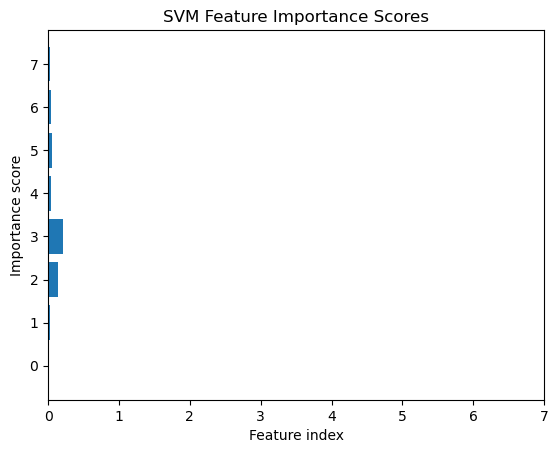

In [ ]:
# Plot feature importance scores
plt.barh(range(x_train.shape[1]), importance_scores)
plt.xticks(range(x_train.shape[1]))
plt.xlabel("Feature index")
plt.ylabel("Importance score")
plt.title("SVM Feature Importance Scores")
plt.show()

In [ ]:
ypred5= svm.predict(x_test)

In [ ]:
encoded_y_fr=np.ravel(encoded_y_f)
scores = cross_val_score(svm, x, encoded_y_fr, cv=5)
mean_score = scores.mean()
print(mean_score)

0.8645135479178032


In [ ]:
print(classification_report(encoded_ytest, ypred5, target_names=target_names))

                   precision    recall  f1-score   support

PCOS_not_detected       0.94      0.97      0.95       209
    PCOS_detected       0.96      0.90      0.93       144

         accuracy                           0.94       353
        macro avg       0.95      0.94      0.94       353
     weighted avg       0.94      0.94      0.94       353



In [ ]:
encoded_y_fr=np.ravel(encoded_y_f)
scores = cross_val_score(svm , x, encoded_y_fr, cv=5)
mean_score = scores.mean()
print(mean_score)

0.8645135479178032


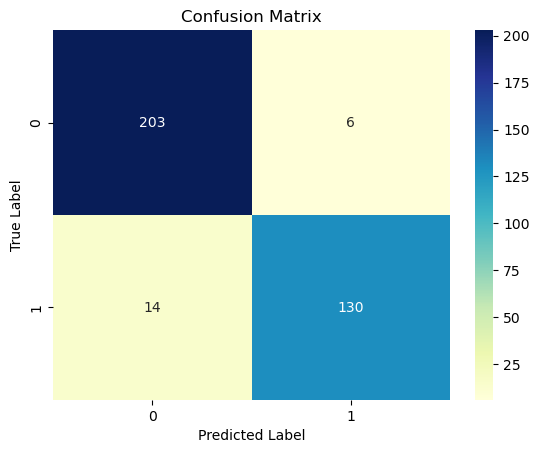

In [ ]:
svm_conf_matrix = confusion_matrix(encoded_ytest, ypred5)
# Plot confusion matrix heatmap
sns.heatmap(svm_conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gb = GradientBoostingClassifier()

# Train the model on the training data
gb.fit(x_train, encoded_y)

# Generate predictions on the test data
y_pred6 = gb.predict(x_test)


In [ ]:
print(classification_report(encoded_ytest, y_pred6, target_names=target_names))

                   precision    recall  f1-score   support

PCOS_not_detected       1.00      1.00      1.00       209
    PCOS_detected       0.99      1.00      1.00       144

         accuracy                           1.00       353
        macro avg       1.00      1.00      1.00       353
     weighted avg       1.00      1.00      1.00       353



In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['f1']
cv_results = []

for train_index, test_index in kf.split(x):
    x_train_fold = x.iloc[train_index]
    y_train_fold = encoded_y_f.iloc[train_index]
    y_train_fold = np.ravel(y_train_fold)
    x_test_fold = x.iloc[test_index]
    y_test_fold = encoded_y_f.iloc[test_index]

    gb.fit(x_train_fold, y_train_fold)
    y_pred_fold = gb.predict(x_test_fold)

    cv_results.append({
        'train_index': train_index,
        'test_index': test_index,
        'f1_score': f1_score(y_test_fold, y_pred_fold)
    })

# Select the best fold based on the F1 score
best_fold = min(cv_results, key=lambda x: x['f1_score'])

# Train and test the model on the best fold
x_train_best_fold = x.iloc[best_fold['train_index']]
y_train_best_fold = encoded_y_f.iloc[best_fold['train_index']]
y_train_best_fold = np.ravel(y_train_best_fold)
x_test_best_fold = x.iloc[best_fold['test_index']]
y_test_best_fold = encoded_y_f.iloc[best_fold['test_index']]


In [ ]:
gb.fit(x_train_best_fold, y_train_best_fold)
y_pred_best_fold = gb.predict(x_test_best_fold)

# Evaluate the model on the best fold
print(classification_report(y_test_best_fold, y_pred_best_fold))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       152
           1       0.95      0.99      0.97        83

    accuracy                           0.98       235
   macro avg       0.97      0.98      0.98       235
weighted avg       0.98      0.98      0.98       235



In [ ]:
encoded_y_fr=np.ravel(encoded_y_f)
scores = cross_val_score(gb, x, encoded_y_fr, cv=5)
mean_score = scores.mean()
print(mean_score)

0.8789889070740134


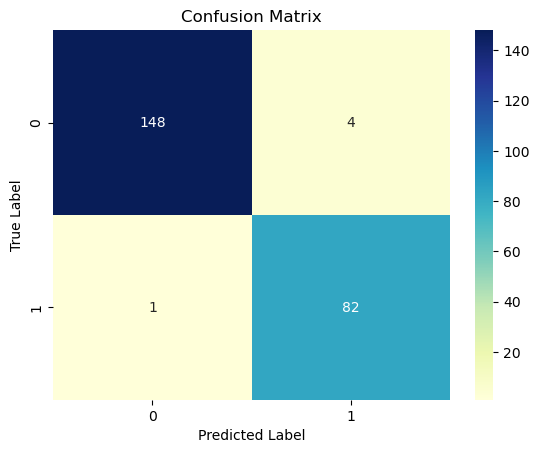

In [ ]:
gb_conf_matrix = confusion_matrix(y_test_best_fold, y_pred_best_fold)
# Plot confusion matrix heatmap
sns.heatmap(gb_conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the number of neurons for each layer
input_neurons = 8
hidden_neurons = 16
output_neurons = 1

# Define the model architecture
model = Sequential()
model.add(Dense(hidden_neurons, input_dim=input_neurons, activation='relu'))
model.add(Dense(output_neurons, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs= 5, validation_data=(x_test, y_test))


Epoch 1/5
26/26 [==============================] - 1s 10ms/step - loss: 0.7693 - accuracy: 0.0000e+00 - val_loss: 0.6852 - val_accuracy: 0.0000e+00
Epoch 2/5
26/26 [==============================] - 0s 6ms/step - loss: 0.5827 - accuracy: 0.0000e+00 - val_loss: 0.5348 - val_accuracy: 0.0000e+00
Epoch 3/5
26/26 [==============================] - 0s 5ms/step - loss: 0.4102 - accuracy: 0.0000e+00 - val_loss: 0.3932 - val_accuracy: 0.0000e+00
Epoch 4/5
26/26 [==============================] - 0s 5ms/step - loss: 0.2464 - accuracy: 0.0000e+00 - val_loss: 0.2529 - val_accuracy: 0.0000e+00
Epoch 5/5
26/26 [==============================] - 0s 6ms/step - loss: 0.0853 - accuracy: 0.0000e+00 - val_loss: 0.1129 - val_accuracy: 0.0000e+00


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_train)


C:\Users\DBANSJ2\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


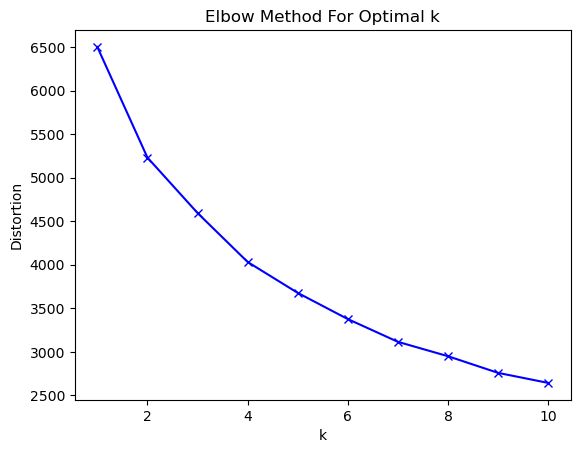

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
# Define range of k values to test
k_range = range(1, 11)

# Calculate distortions for each value of k
distortions = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_train)
    distortions.append(kmeans.inertia_)

# Plot distortions vs k values
plt.plot(k_range, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(x_train)
labels_train = kmeans.labels_
labels_test = kmeans.predict(x_test)

score_train = silhouette_score(x_train, labels_train)
score_test = silhouette_score(x_test, labels_test)

print("Training Silhouette Coefficient:", score_train)
print("Test Silhouette Coefficient:", score_test)

Training Silhouette Coefficient: 0.4186232868272879
Test Silhouette Coefficient: 0.4222711617413191


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Create an instance of the AgglomerativeClustering class
agg_clustering = AgglomerativeClustering(n_clusters=2)

# Fit the model to the training data
agg_clustering.fit(x_train)

# Get the cluster labels for the training and test data
labels_train = agg_clustering.labels_
labels_test = agg_clustering.fit_predict(x_test)

# Calculate the silhouette score for the training and test data
score_train = silhouette_score(x_train, labels_train)
score_test = silhouette_score(x_test, labels_test)

print("Training Silhouette Coefficient:", score_train)
print("Test Silhouette Coefficient:", score_test)


Training Silhouette Coefficient: 0.4944646153205102
Test Silhouette Coefficient: 0.5122254366498667


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Create an instance of the GaussianMixture class
gmm = GaussianMixture(n_components=2)

# Fit the model to the training data
gmm.fit(x_train)

# Get the cluster labels for the training and test data
labels_train = gmm.predict(x_train)
labels_test = gmm.predict(x_test)

# Calculate the silhouette score for the training and test data
score_train = silhouette_score(x_train, labels_train)
score_test = silhouette_score(x_test, labels_test)

print("Training Silhouette Coefficient:", score_train)
print("Test Silhouette Coefficient:", score_test)


Training Silhouette Coefficient: 0.3981408912845903
Test Silhouette Coefficient: 0.38463382182190553


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Create an instance of the DBSCAN class
dbscan = DBSCAN(eps=5, min_samples=2)

# Fit the model to the training data
dbscan.fit(x_train)

# Get the cluster labels for the training and test data
labels_train = dbscan.labels_
labels_test = dbscan.fit_predict(x_test)

# Calculate the silhouette score for the training and test data
score_train = silhouette_score(x_train, labels_train)
score_test = silhouette_score(x_test, labels_test)

print("Training Silhouette Coefficient:", score_train)
print("Test Silhouette Coefficient:", score_test)


Training Silhouette Coefficient: 0.5865093432797109
Test Silhouette Coefficient: 0.5812358083025183


In [ ]:
import pickle
filename = 'PCOS-prediction-logreg-model.pkl'
pickle.dump(logreg, open(filename, 'wb'))

In [ ]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Importing essential libraries
from flask import Flask, render_template, request
import pickle
import numpy as np

# Load the Random Forest CLassifier model
filename = r'C:\Users\DBANSJ2\Downloads\End-to-End-Diabetes-Prediction-Application-Using-Machine-Learning-master\PCOS-prediction-logreg-model.pkl'
classifier = pickle.load(open(filename, 'rb'))

app = Flask(__name__)

@app.route('/')
def home():
	return render_template(r'C:\Users\DBANSJ2\Downloads\End-to-End-Diabetes-Prediction-Application-Using-Machine-Learning-master\templates\index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        cp = int(request.form['cp'])
        Glucose = int(request.form['Glucose'])
        trestbps = int(request.form['trestbps'])
        chol = int(request.form['chol'])
        BMI = float(request.form['BMI'])
        fbs = int(request.form['fbs'])
        ca =int(request.form['ca'])
        Age = int(request.form['Age'])

        data = np.array([['Age','BMI','cp','trestbps','chol','Glucose','fbs','ca']])
        my_prediction = classifier.predict(data)

        return render_template(r'C:\Users\DBANSJ2\Downloads\End-to-End-Diabetes-Prediction-Application-Using-Machine-Learning-master\templatesresult.html', prediction=my_prediction)

if __name__ == '__main__':
	app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1